<a href="https://colab.research.google.com/github/Rizkiramdani04/Portofolio_DS_DA/blob/main/Prediction_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,make_scorer,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install jcopml
from jcopml.feature_importance import mean_score_decrease

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
data_all=pd.read_csv('/content/FinanKu Data All.csv')
data_val=pd.read_csv('/content/FinanKu Data Validasi.csv')

In [ ]:
dataset1=data_all.copy()
dataset1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0


In [ ]:
dataset2=data_all.copy()
dataset2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0


In [ ]:
data1=pd.DataFrame(data_all.groupby(by=['City'])['Customer ID'].count().sort_values(ascending=False).reset_index(name='Distribusi Berdasarkan Kota'))
data1

,City,Distribusi Berdasarkan Kota
0,Surabaya,3767
1,Bandung,1898
2,Jakarta,1896


In [ ]:
data2=pd.DataFrame(data_all[data_all['Unpaid Tagging']==1].groupby(by=['City'])['Customer ID'].count().sort_values(ascending=False).reset_index(name='Distribusi Berdasarkan Kota'))
data2

,City,Distribusi Berdasarkan Kota
0,Surabaya,1033
1,Bandung,496
2,Jakarta,490


<Axes: title={'center': 'Cust. Distribusi Berdasarkan Usia'}, xlabel='Age', ylabel='# People'>

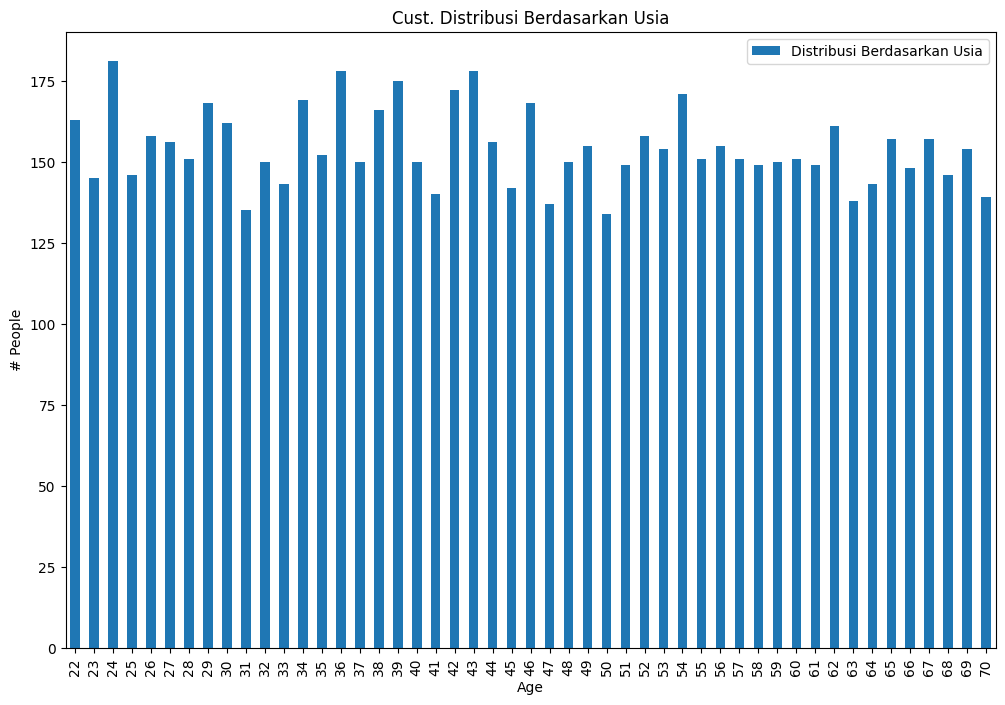

In [ ]:
data3=pd.DataFrame(data_all.groupby(by=['Age'])['Customer ID'].count().reset_index(name='Distribusi Berdasarkan Usia'))
data3.sort_values(by=['Age'],ascending=True,inplace=True)
data3.plot(x='Age',
           y=['Distribusi Berdasarkan Usia'],
           kind='bar',
           xlabel='Age',
           ylabel='# People',
           figsize=(12,8),
           title='Cust. Distribusi Berdasarkan Usia')

<Axes: title={'center': 'Unpaid Cust. Distribusi Berdasarkan Usia'}, xlabel='Age', ylabel='# People'>

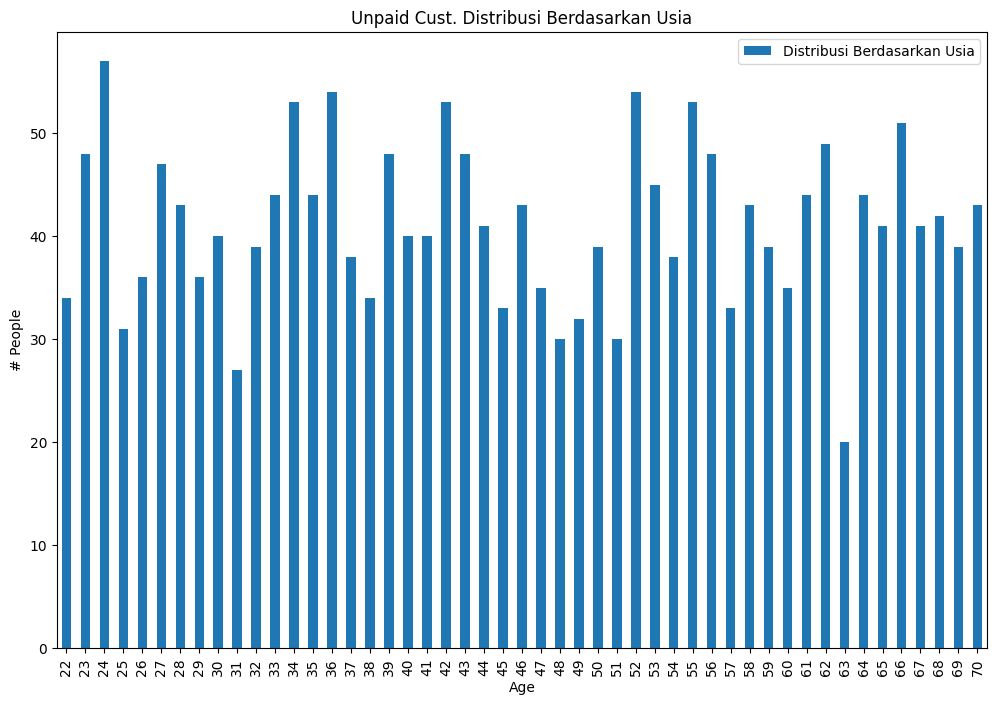

In [ ]:
data4=pd.DataFrame(data_all[data_all['Unpaid Tagging']==1].groupby(by=['Age'])['Customer ID'].count().reset_index(name='Distribusi Berdasarkan Usia'))
data4.sort_values(by=['Age'],
                  ascending=True,
                  inplace=True)
data4.plot(x='Age',
           y=['Distribusi Berdasarkan Usia'],
           kind='bar',
           xlabel='Age',
           ylabel='# People',
           figsize=(12,8),
           title='Unpaid Cust. Distribusi Berdasarkan Usia')

In [ ]:
df_checbalance=data_all

In [ ]:
df_checbalance['Total Balance']=df_checbalance['Balance Q1']+df_checbalance['Balance Q2']+df_checbalance['Balance Q3']+df_checbalance['Balance Q4']
df_checbalance['Avg Balance']=(df_checbalance['Balance Q1']+df_checbalance['Balance Q2']+df_checbalance['Balance Q3']+df_checbalance['Balance Q4'])/4


In [ ]:
data5=pd.DataFrame(df_checbalance.groupby(by=['Unpaid Tagging'])['Total Balance'].mean().reset_index(name='Avg Annual Balance'))
data5

,Unpaid Tagging,Avg Annual Balance
0,0,1.985924e+08
1,1,2.527238e+08


In [ ]:
data6=pd.DataFrame(df_checbalance.groupby(by=['Unpaid Tagging'])['Avg Balance'].mean().reset_index(name='Avg Quartely Balance'))
data6

,Unpaid Tagging,Avg Quartely Balance
0,0,4.964809e+07
1,1,6.318095e+07


In [ ]:
df_checbalance['Avg Product']=(df_checbalance['NumOfProducts Q1']+df_checbalance['NumOfProducts Q2']+df_checbalance['NumOfProducts Q3']+df_checbalance['NumOfProducts Q4'])/4
data7=pd.DataFrame(df_checbalance.groupby(by=['Unpaid Tagging'])['Avg Product'].mean().reset_index(name='Avh Product Ownes'))
data7

,Unpaid Tagging,Avh Product Ownes
0,0,1.667223
1,1,1.609336


In [ ]:
data_all=data_all.drop(columns=['Total Balance','Avg Balance','Avg Product'])
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               7561 non-null   int64  
 1   Branch Code               7561 non-null   int64  
 2   City                      7561 non-null   object 
 3   Age                       7561 non-null   int64  
 4   Avg. Annual Income/Month  7561 non-null   int64  
 5   Balance Q1                7561 non-null   float64
 6   NumOfProducts Q1          7561 non-null   int64  
 7   HasCrCard Q1              7561 non-null   int64  
 8   ActiveMember Q1           7561 non-null   int64  
 9   Balance Q2                7561 non-null   float64
 10  NumOfProducts Q2          7561 non-null   int64  
 11  HasCrCard Q2              7561 non-null   int64  
 12  ActiveMember Q2           7561 non-null   int64  
 13  Balance Q3                7561 non-null   float64
 14  NumOfPro

## Data Preparation

### Pengecekan Data Duplikat Dan Missing Data

In [ ]:
data_all.duplicated().sum()

0

In [ ]:
data_all.isnull().sum()

,0
Customer ID,0
Branch Code,0
City,0
Age,0
Avg. Annual Income/Month,0
Balance Q1,0
NumOfProducts Q1,0
HasCrCard Q1,0
ActiveMember Q1,0
Balance Q2,0


## Penambahan Variabel Relevan
**Rata-rata Saldo & Perubahan Saldo Selama Periode Observasi**

Melihat saldo nasabah dalam scope observasi
1. Experiment 1: Rata-rata saldo nasabah dalam 1 tahun terakhir & Perubahan Saldo di Q4 terhadap Q1
2. Experiment 2: Rata-rata saldo nasabah dalam 6 bulan terakhir & Perubahan Saldo di Q4 terhadap Q2

In [ ]:
dataset1['Mean Balance']=(dataset1['Balance Q1']+dataset1['Balance Q2']+dataset1['Balance Q3']+dataset1['Balance Q4'])/4
dataset1['Delta Balance']=dataset1['Balance Q4']-dataset1['Balance Q1']
dataset1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68


In [ ]:
dataset2['Mean Balance']=(dataset2['Balance Q3']+dataset2['Balance Q4'])/2
dataset2['Delta Balance']=dataset2['Balance Q4']-dataset2['Balance Q2']
dataset2

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.000000e+00,1,1,1,0.000000e+00,1,1,0,0.000000e+00,1,1,0,1.187036e+06,1,1,1,1,5.935181e+05,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.00
2,15566091,1009,Jakarta,25,12000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1.351820e+06,2,1,1,0,6.759101e+05,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.00
4,15566312,1009,Jakarta,43,29000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,6.789057e+05,2,1,1,4.311907e+05,2,1,1,0,5.550482e+05,431190.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15815552,1023,Surabaya,33,16000000,3.038546e+07,1,1,0,2.994553e+07,1,1,1,2.982045e+07,1,1,1,3.020002e+07,1,1,1,1,3.001023e+07,254488.00
7557,15815615,1024,Surabaya,55,18000000,1.685507e+08,1,1,0,1.685507e+08,1,1,0,1.685507e+08,1,1,0,1.685507e+08,1,1,0,0,1.685507e+08,0.00
7558,15815628,1024,Surabaya,48,18000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.00
7559,15815645,1021,Surabaya,69,20000000,3.795000e+07,1,1,1,3.771258e+07,1,1,1,3.776761e+07,1,1,1,3.793504e+07,1,1,1,0,3.785132e+07,222458.00


**Status Keaktifan**

Melihat periode nasabah aktif dalam scope observasi
1. Experiment 1 --> Keaktifan nasabah (dalam bulan) di 1 tahun terakhir
2. Experiment 2 --> Keaktifan nasabah (dalam bulan) di 6 bulan terakhir

In [ ]:
dataset1['Active Months']=(dataset1['ActiveMember Q1']+dataset1['ActiveMember Q2']+dataset1['ActiveMember Q3']+dataset1['ActiveMember Q4'])*3
dataset1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6


In [ ]:
dataset2['Active Months']=(dataset2['ActiveMember Q3']+dataset2['ActiveMember Q4'])*3
dataset2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68,6


**Penambahan/Pengurangan Product Holding**

Melihat fluktuasi kepemilikan produk nasabah dalam periode observasi

In [ ]:
dataset1['Diff PH']=dataset1['NumOfProducts Q4']-dataset1['NumOfProducts Q1']
dataset1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0


In [ ]:
dataset2['Diff PH']=dataset2['NumOfProducts Q4']-dataset2['NumOfProducts Q2']
dataset2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68,6,0


In [ ]:
def assign(df):
  if df['HasCrCard Q1']==1:
    return 12
  elif df['HasCrCard Q2']==1:
    return 9
  elif df['HasCrCard Q3']==1:
    return 6
  else:
    return 3
  return np.nan

In [ ]:
dataset1['Vintage_CR']=dataset1.apply(assign,axis=1)
dataset1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0,12


In [ ]:
dataset2['Vintage_CR']=dataset2.apply(assign,axis=1)
dataset2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68,6,0,12


## Penghapusan Variabel

In [ ]:
dataset1=dataset1.drop(columns=['HasCrCard Q1','HasCrCard Q2','HasCrCard Q3','HasCrCard Q4'])
dataset2=dataset2.drop(columns=['HasCrCard Q1','HasCrCard Q2','HasCrCard Q3','HasCrCard Q4'])

In [ ]:
dataset1=dataset1.drop(columns=['Balance Q1','Balance Q2','Balance Q3','Balance Q4'])
dataset2=dataset2.drop(columns=['Balance Q1','Balance Q2','Balance Q3','Balance Q4'])

In [ ]:
dataset1=dataset1.drop(columns=['NumOfProducts Q1','NumOfProducts Q2','NumOfProducts Q3','NumOfProducts Q4'])
dataset2=dataset2.drop(columns=['NumOfProducts Q1','NumOfProducts Q2','NumOfProducts Q3','NumOfProducts Q4'])

In [ ]:
dataset1=dataset1.drop(columns=['ActiveMember Q1','ActiveMember Q2','ActiveMember Q3','ActiveMember Q4'])
dataset2=dataset2.drop(columns=['ActiveMember Q1','ActiveMember Q2','ActiveMember Q3','ActiveMember Q4'])

In [ ]:
dataset1.info()
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               7561 non-null   int64  
 1   Branch Code               7561 non-null   int64  
 2   City                      7561 non-null   object 
 3   Age                       7561 non-null   int64  
 4   Avg. Annual Income/Month  7561 non-null   int64  
 5   Unpaid Tagging            7561 non-null   int64  
 6   Mean Balance              7561 non-null   float64
 7   Delta Balance             7561 non-null   float64
 8   Active Months             7561 non-null   int64  
 9   Diff PH                   7561 non-null   int64  
 10  Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 649.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 11 columns):
 #   Co

In [ ]:
predictor1=dataset1[dataset1.columns.difference(['Customer ID','Unpaid Tagging'])]
predictor2=dataset1[dataset2.columns.difference(['Customer ID','Unpaid Tagging'])]

In [ ]:
predictor1.head()

,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,6,29,33000000,1001,Jakarta,1187036.18,0,296759.045,12
1,3,68,17000000,1005,Jakarta,0.00,0,0.000,12
2,3,25,12000000,1009,Jakarta,1351820.24,0,337955.060,12
3,3,42,19000000,1008,Jakarta,0.00,0,0.000,12
4,6,43,29000000,1009,Jakarta,431190.68,0,277524.090,12


In [ ]:
predictor2.head()

,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,6,29,33000000,1001,Jakarta,1187036.18,0,296759.045,12
1,3,68,17000000,1005,Jakarta,0.00,0,0.000,12
2,3,25,12000000,1009,Jakarta,1351820.24,0,337955.060,12
3,3,42,19000000,1008,Jakarta,0.00,0,0.000,12
4,6,43,29000000,1009,Jakarta,431190.68,0,277524.090,12


In [ ]:
predictor1['Branch Code']=predictor1['Branch Code'].astype(str)
predictor2['Branch Code']=predictor2['Branch Code'].astype(str)
predictor1.info()
predictor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Active Months             7561 non-null   int64  
 1   Age                       7561 non-null   int64  
 2   Avg. Annual Income/Month  7561 non-null   int64  
 3   Branch Code               7561 non-null   object 
 4   City                      7561 non-null   object 
 5   Delta Balance             7561 non-null   float64
 6   Diff PH                   7561 non-null   int64  
 7   Mean Balance              7561 non-null   float64
 8   Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Acti

<ipython-input-88-60a73e1bd838>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1['Branch Code']=predictor1['Branch Code'].astype(str)
<ipython-input-88-60a73e1bd838>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2['Branch Code']=predictor2['Branch Code'].astype(str)


In [ ]:
predictor1=pd.get_dummies(predictor1).astype(int)
predictor2=pd.get_dummies(predictor2).astype(int)

In [ ]:
predname = predictor1.columns
predname_num = predictor1.columns[0:7]
predname_cat = predictor1.columns[7:31]

In [ ]:
predname

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR', 'Branch Code_1001',
       'Branch Code_1002', 'Branch Code_1003', 'Branch Code_1004',
       'Branch Code_1005', 'Branch Code_1006', 'Branch Code_1007',
       'Branch Code_1008', 'Branch Code_1009', 'Branch Code_1011',
       'Branch Code_1012', 'Branch Code_1013', 'Branch Code_1014',
       'Branch Code_1015', 'Branch Code_1021', 'Branch Code_1022',
       'Branch Code_1023', 'Branch Code_1024', 'City_Bandung', 'City_Jakarta',
       'City_Surabaya'],
      dtype='object')

In [ ]:
predname_num

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR'],
      dtype='object')

In [ ]:
predname_cat

Index(['Branch Code_1001', 'Branch Code_1002', 'Branch Code_1003',
       'Branch Code_1004', 'Branch Code_1005', 'Branch Code_1006',
       'Branch Code_1007', 'Branch Code_1008', 'Branch Code_1009',
       'Branch Code_1011', 'Branch Code_1012', 'Branch Code_1013',
       'Branch Code_1014', 'Branch Code_1015', 'Branch Code_1021',
       'Branch Code_1022', 'Branch Code_1023', 'Branch Code_1024',
       'City_Bandung', 'City_Jakarta', 'City_Surabaya'],
      dtype='object')

In [ ]:
X1_num = predictor1[predname_num]
X2_num = predictor2[predname_num]
X1_cat = predictor1[predname_cat]
X2_cat = predictor2[predname_cat]

In [ ]:
from sklearn.preprocessing import StandardScaler
pt=StandardScaler()
X1_num=pd.DataFrame(pt.fit_transform(X1_num))
X1_num.head()

,0,1,2,3,4,5,6
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [ ]:
X1_num.columns=predname_num
X1_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [ ]:
X2_num=pd.DataFrame(pt.fit_transform(X2_num))
X2_num.head()

,0,1,2,3,4,5,6
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [ ]:
X2_num.columns=predname_num
X2_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


## Menggabungkan Dataset Predictor

In [ ]:
X1 = pd.concat([X1_cat, X1_num], axis = 1)
X2 = pd.concat([X2_cat, X2_num], axis = 1)

In [ ]:
X1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [ ]:
y1=dataset1['Unpaid Tagging']
y2=dataset2['Unpaid Tagging']

In [ ]:
data_val1=data_val
data_val2=data_val

In [ ]:
data_val1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


## Penambahan Variabel Relevan

In [ ]:
data_val1['Mean Balance']=(data_val1['Balance Q2']+data_val1['Balance Q3']+data_val1['Balance Q4']+data_val1['Balance Q5'])/4
data_val2['Mean Balance']=(data_val2['Balance Q4']+data_val2['Balance Q5'])/2

In [ ]:
data_val1['Delta Balance']=data_val1['Balance Q5']-data_val1['Balance Q2']
data_val2['Delta Balance']=data_val2['Balance Q5']-data_val2['Balance Q3']

In [ ]:
data_val1['Active Months']=(data_val1['ActiveMember Q2']+data_val1['ActiveMember Q3']+data_val1['ActiveMember Q4']+data_val1['ActiveMember Q5'])+3
data_val2['Active Months']=(data_val2['ActiveMember Q4']+data_val2['ActiveMember Q5'])*3

In [ ]:
data_val1['Diff PH']=data_val1['NumOfProducts Q5']-data_val1['NumOfProducts Q2']
data_val2['Diff PH']=data_val2['NumOfProducts Q5']-data_val2['NumOfProducts Q3']

In [ ]:
def assign(df):
  if df['HasCrCard Q2']==1:
    return 12
  elif df['HasCrCard Q3']==1:
    return 9
  elif df['HasCrCard Q4']==1:
    return 6
  else:
    return 3
  return np.nan

In [ ]:
data_val1['Vintage_CR']=data_val1.apply(assign,axis=1)
data_val2['Vintage_CR']=data_val2.apply(assign,axis=1)

## Penghapusan Variabel

In [ ]:
data_val1 = data_val1.drop(columns = ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4','Balance Q5', 'Balance Q2', 'Balance Q3', 'Balance Q4','NumOfProducts Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4','ActiveMember Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])
data_val2 = data_val2.drop(columns = ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4','Balance Q5', 'Balance Q2', 'Balance Q3', 'Balance Q4','NumOfProducts Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4','ActiveMember Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])

## Pemilihan Variabel Predictor

In [ ]:
predictor1_val=data_val1[data_val1.columns.difference(['Customer ID','Unpaid Tagging'])]
predictor2_val=data_val2[data_val2.columns.difference(['Customer ID','Unpaid Tagging'])]

In [ ]:
predictor1_val['Branch Code']=predictor1_val['Branch Code'].astype(str)
predictor2_val['Branch Code']=predictor2_val['Branch Code'].astype(str)

<ipython-input-113-819239df688e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1_val['Branch Code']=predictor1_val['Branch Code'].astype(str)
<ipython-input-113-819239df688e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2_val['Branch Code']=predictor2_val['Branch Code'].astype(str)


In [ ]:
predictor1_val = pd.get_dummies(predictor1_val).astype(int)
predictor2_val = pd.get_dummies(predictor2_val).astype(int)

In [ ]:
X1_num_val = predictor1_val[predname_num]
X2_num_val = predictor2_val[predname_num]
X1_cat_val = predictor1_val[predname_cat]
X2_cat_val = predictor2_val[predname_cat]

In [ ]:
X1_num_val = pd.DataFrame(pt.fit_transform(X1_num_val))
X1_num_val.columns = predname_num

X2_num_val = pd.DataFrame(pt.fit_transform(X2_num_val))
X2_num_val.columns = predname_num

In [ ]:
X1_val = pd.concat([X1_cat, X1_num], axis = 1)
X2_val = pd.concat([X2_cat, X2_num], axis = 1)

In [ ]:
y1_val = data_val1['Unpaid Tagging']
y2_val = data_val2['Unpaid Tagging']

In [ ]:
corrtest1 = X1.corr().abs()
corrtest2 = X2.corr().abs()

In [ ]:
corrtest1

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
Branch Code_1001,1.000000,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,0.028707,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.000365,0.010394,0.003603,0.001462,0.003888,0.009732,0.020774
Branch Code_1002,0.028917,1.000000,0.029128,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.007664,0.006371,0.016078,0.004592,0.003957,0.005634,0.034256
Branch Code_1003,0.028917,0.029128,1.000000,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.018168,0.013724,0.001937,0.008577,0.004227,0.001776,0.021341
Branch Code_1004,0.029673,0.029889,0.029889,1.000000,0.030318,0.028570,0.028941,0.029163,0.029673,0.041555,0.040897,0.040676,0.039442,0.038699,0.066548,0.064658,0.065546,0.067463,0.101388,0.302721,0.174506,0.001120,0.008420,0.002095,0.015427,0.001172,0.013269,0.003376
Branch Code_1005,0.029331,0.029545,0.029545,0.030318,1.000000,0.028241,0.028608,0.028827,0.029331,0.041076,0.040426,0.040208,0.038988,0.038253,0.065782,0.063914,0.064792,0.066686,0.100221,0.299236,0.172498,0.011655,0.001335,0.008829,0.010599,0.001569,0.007520,0.002246
Branch Code_1006,0.027640,0.027842,0.027842,0.028570,0.028241,1.000000,0.026959,0.027165,0.027640,0.038708,0.038095,0.037889,0.036740,0.036048,0.061989,0.060229,0.061056,0.062841,0.094442,0.281983,0.162551,0.006704,0.004534,0.007488,0.000112,0.017499,0.004003,0.008669
Branch Code_1007,0.028000,0.028204,0.028204,0.028941,0.028608,0.026959,1.000000,0.027518,0.028000,0.039212,0.038591,0.038383,0.037219,0.036517,0.062796,0.061013,0.061851,0.063659,0.095672,0.285654,0.164668,0.010148,0.011408,0.024003,0.002511,0.018648,0.006408,0.003749
Branch Code_1008,0.028214,0.028420,0.028420,0.029163,0.028827,0.027165,0.027518,1.000000,0.028214,0.039511,0.038886,0.038676,0.037503,0.036796,0.063276,0.061479,0.062323,0.064146,0.096403,0.287836,0.165926,0.000426,0.005992,0.000678,0.003350,0.006413,0.001808,0.016428
Branch Code_1009,0.028707,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,1.000000,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.002480,0.002933,0.012510,0.001391,0.012129,0.005874,0.014582
Branch Code_1011,0.040203,0.040496,0.040496,0.041555,0.041076,0.038708,0.039212,0.039511,0.040203,1.000000,0.055410,0.055110,0.053439,0.052431,0.090163,0.087603,0.088806,0.091403,0.409857,0.137270,0.236432,0.001055,0.011252,0.016018,0.025531,0.004062,0.005530,0.020666


In [ ]:
corrtest2

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
Branch Code_1001,1.000000,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,0.028707,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.000365,0.010394,0.003603,0.001462,0.003888,0.009732,0.020774
Branch Code_1002,0.028917,1.000000,0.029128,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.007664,0.006371,0.016078,0.004592,0.003957,0.005634,0.034256
Branch Code_1003,0.028917,0.029128,1.000000,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.018168,0.013724,0.001937,0.008577,0.004227,0.001776,0.021341
Branch Code_1004,0.029673,0.029889,0.029889,1.000000,0.030318,0.028570,0.028941,0.029163,0.029673,0.041555,0.040897,0.040676,0.039442,0.038699,0.066548,0.064658,0.065546,0.067463,0.101388,0.302721,0.174506,0.001120,0.008420,0.002095,0.015427,0.001172,0.013269,0.003376
Branch Code_1005,0.029331,0.029545,0.029545,0.030318,1.000000,0.028241,0.028608,0.028827,0.029331,0.041076,0.040426,0.040208,0.038988,0.038253,0.065782,0.063914,0.064792,0.066686,0.100221,0.299236,0.172498,0.011655,0.001335,0.008829,0.010599,0.001569,0.007520,0.002246
Branch Code_1006,0.027640,0.027842,0.027842,0.028570,0.028241,1.000000,0.026959,0.027165,0.027640,0.038708,0.038095,0.037889,0.036740,0.036048,0.061989,0.060229,0.061056,0.062841,0.094442,0.281983,0.162551,0.006704,0.004534,0.007488,0.000112,0.017499,0.004003,0.008669
Branch Code_1007,0.028000,0.028204,0.028204,0.028941,0.028608,0.026959,1.000000,0.027518,0.028000,0.039212,0.038591,0.038383,0.037219,0.036517,0.062796,0.061013,0.061851,0.063659,0.095672,0.285654,0.164668,0.010148,0.011408,0.024003,0.002511,0.018648,0.006408,0.003749
Branch Code_1008,0.028214,0.028420,0.028420,0.029163,0.028827,0.027165,0.027518,1.000000,0.028214,0.039511,0.038886,0.038676,0.037503,0.036796,0.063276,0.061479,0.062323,0.064146,0.096403,0.287836,0.165926,0.000426,0.005992,0.000678,0.003350,0.006413,0.001808,0.016428
Branch Code_1009,0.028707,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,1.000000,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.002480,0.002933,0.012510,0.001391,0.012129,0.005874,0.014582
Branch Code_1011,0.040203,0.040496,0.040496,0.041555,0.041076,0.038708,0.039212,0.039511,0.040203,1.000000,0.055410,0.055110,0.053439,0.052431,0.090163,0.087603,0.088806,0.091403,0.409857,0.137270,0.236432,0.001055,0.011252,0.016018,0.025531,0.004062,0.005530,0.020666


In [ ]:
# Membuang Nilai Redundan Pada Matriks
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(bool))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
X1 = X1.drop(to_drop, axis=1)
X1_val = X1_val.drop(to_drop, axis=1)

In [ ]:
X1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [ ]:
# Membuang Nilai Redundan Pada Matriks
upper2 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(bool))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop2 = [column for column in upper2.columns if any(upper2[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
X2 = X2.drop(to_drop2, axis=1)
X2_val = X2_val.drop(to_drop2, axis=1)

### Split Train-Test Data

In [ ]:
y1.value_counts()

,count
Unpaid Tagging,
0,5542
1,2019


In [ ]:
y2.value_counts()

,count
Unpaid Tagging,
0,5542
1,2019


In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=30)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=30)

## Modelling

###Logistic Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer # Importing necessary scoring functions

parameter = {'max_depth':[5,10,15,20],'max_features':['auto','sqrt','log2'], 'n_estimators':[25,50,75,100,125],'min_samples_split':[2,3,5,7]}
score = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}
parameter = {'max_depth':[5,10,15,20],'max_features':['auto','sqrt','log2'], 'n_estimators':[25,50,75,100,125],'min_samples_split':[2,3,5,7]}
score = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

In [ ]:
RF_Grid = GridSearchCV(RandomForestClassifier(), parameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [ ]:
start_time = time.time()
RF_result = RF_Grid.fit(X1_train, y1_train)
# Summarize results
print("Best: %f using %s" % (RF_result.best_score_, RF_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best: 0.324850 using {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 25}
Execution time: 299.2061183452606 s


In [ ]:
RF_Grid2 = GridSearchCV(RandomForestClassifier(), parameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [ ]:
start_time = time.time()
RF_result2 = RF_Grid2.fit(X2_train, y2_train)
# Summarize results
print("Best: %f using %s" % (RF_result2.best_score_, RF_result2.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best: 0.327690 using {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 25}
Execution time: 263.72924065589905 s


## Evaluation

In [ ]:
y12_pred =RF_Grid.predict(X1_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y12_pred))
print("Recall:",metrics.recall_score(y1_test, y12_pred))
metrics.completeness_score

Accuracy: 0.8056412516527105
Recall: 0.33003300330033003


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [ ]:
y12_pred_val =RF_Grid.predict(X1_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_val, y12_pred_val))
print("Recall:",metrics.recall_score(y1_val, y12_pred_val))
metrics.completeness_score

Accuracy: 0.7055944980822643
Recall: 0.3521594684385382


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

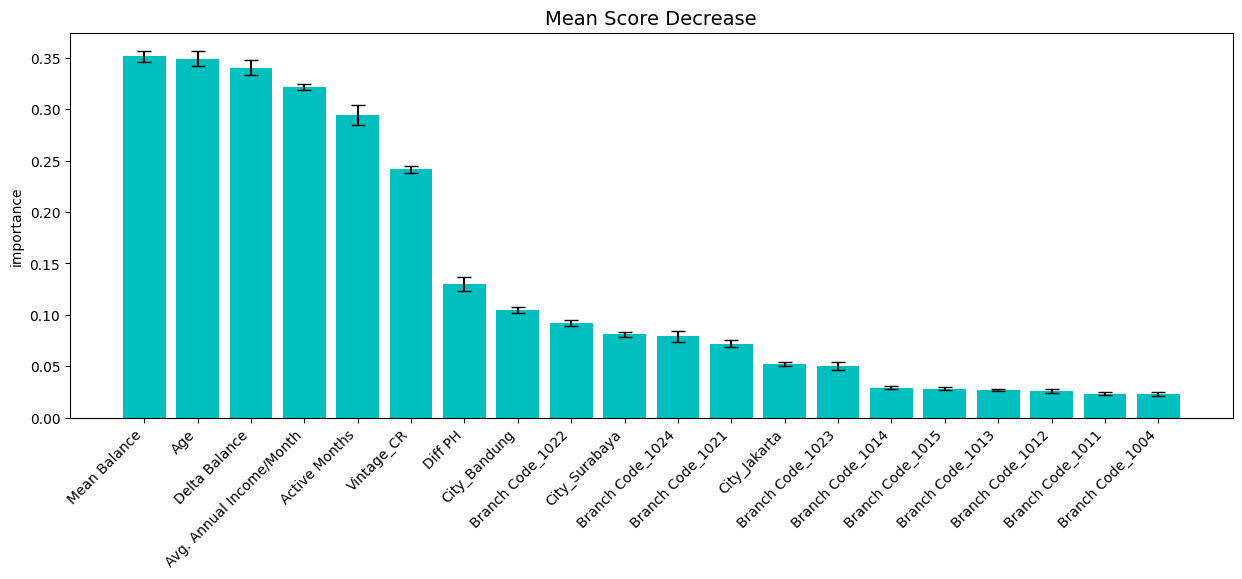

In [ ]:
df_imp5 = mean_score_decrease(X1_train, y1_train, RF_Grid, plot= True, topk=20)

experimen 2

In [ ]:
y21_pred =RF_Grid2.predict(X2_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y21_pred))
print("Recall:",metrics.recall_score(y2_test, y21_pred))
metrics.completeness_score

Accuracy: 0.8126928162185985
Recall: 0.3432343234323432


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [ ]:
y21_pred_val =RF_Grid2.predict(X2_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_val, y21_pred_val))
print("Recall:",metrics.recall_score(y2_val, y21_pred_val))
metrics.completeness_score

Accuracy: 0.7034783758762069
Recall: 0.3385012919896641


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

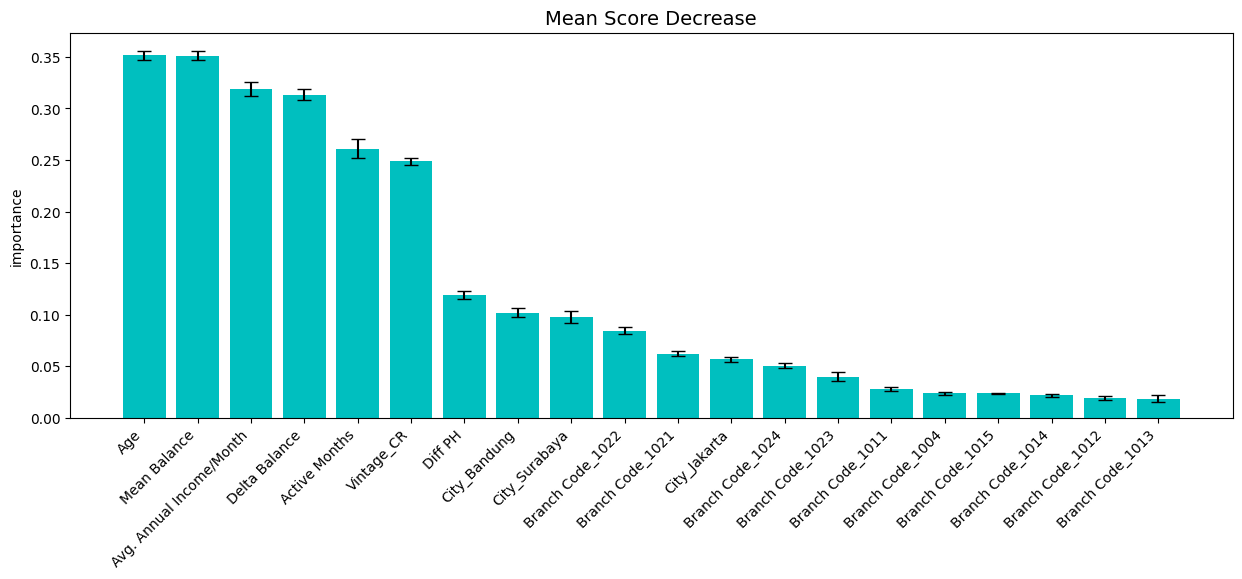

In [ ]:
df_imp6 = mean_score_decrease(X2_train, y2_train, RF_Grid2, plot= True, topk=20)